<b>Problem:</b>
<p>In the following images, remove noise as best you can. What is the best method to eliminate noise for each image?:</p>
<table border="0">
    <tr>
        <td><img align="center" width="75%" src="images/arbol.jpg"></td>
        <td><img align="center" width="75%" src="images/radiografia.jpg"></td>
    </tr>
</table>


<b>Add Required Packages:</b>

In [ ]:
Pkg.add("Images")
Pkg.add("ImageMagick")
Pkg.add("ImageView")
Pkg.add("PyPlot")
kg.add("Gadfly")

Pkg.update()

<b>Adquire Image Function:</b>

In [7]:
function getImgMatrix(file)
    #Adquire Image, convert to Gray and then return a Array{Int32} object
    binImage=convert(Image{Gray},load(file))
    grayImage=raw(binImage)

    imgMatrix = convert(Array{Int32},grayImage)
    return imgMatrix
end

getImgMatrix (generic function with 1 method)

<b>Mean Filter Function:</b>

In [8]:
function filtroMediana(imgMatrix, rowMask, colMask)
    rowsPadding= Int((rowMask - 1) / 2)
    colsPadding= Int((colMask - 1) / 2)
    
    cols,rows=size(imgMatrix)
    
    padded=zeros(cols+(2*colsPadding),rows+(2*rowsPadding))
    padded[colsPadding+1:colsPadding+cols, rowsPadding+1:rowsPadding+rows] = imgMatrix
    
    out=zeros(Int,cols+(2*colsPadding),rows+(2*rowsPadding))
    
    for i=rowsPadding+1: rowsPadding+rows
        for j=colsPadding+1: colsPadding+cols
            aux=padded[j-colsPadding: j+rowsPadding, i-rowsPadding:i+rowsPadding]
            s=sort(aux[:])
            out[j,i]=s[convert(Int,(rowMask*colMask)/2 + 0.5)]
        end
    end
    
    out = out[colsPadding+1: colsPadding+cols, rowsPadding+1:rowsPadding+rows]
    return out
end

filtroMediana (generic function with 1 method)

<b>Execution:</b>

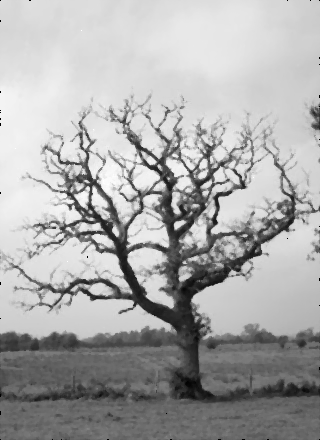

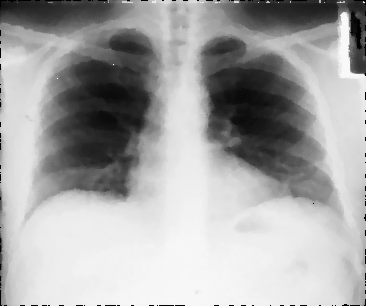

In [9]:
using Images, Colors, FixedPointNumbers, ImageView

imgMatrixArbol=getImgMatrix("images/arbol.jpg")
imgMatrixRadiografia=getImgMatrix("images/radiografia.jpg")

newArbol=filtroMediana(imgMatrix,3,3)
newRadiografia=filtroMediana(imgMatrixRadiografia,5,5)

imgOutArbol = convert(Array{UInt8,2},newArbol)
imgOutArbol = grayim(imgOutArbol)

imgOutRadio = convert(Array{UInt8,2},newRadiografia)
imgOutRadio = grayim(imgOutRadio)

#Display new image and histogram
display(imgOutArbol)
display(imgOutRadio)